# MUSHROOMS

## Binary Classification

### Imports

In [1]:
import os
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

### Load Data

In [2]:
DATA_PATH = '../DATA/'
FILE_NAME = 'mushrooms.csv'
def load_data(data_path=DATA_PATH, file_name=FILE_NAME):
    csv_path = os.path.join(data_path, file_name)
    return pd.read_csv(csv_path)

dataset = load_data()

### View Data and Informations

In [3]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
edible, poisonous = dataset['class'].value_counts()

print("Edible:\t  ", edible,"\nPoisonous:", poisonous)

Edible:	   4208 
Poisonous: 3916


In [6]:
# Categorical to numerical
labels = {'e': 0, 'p': 1}
dataset['class'].replace(labels, inplace=True)

edible, poisonous = dataset['class'].value_counts()
print("0 - Edible:   ", edible,"\n1 - Poisonous:", poisonous)

0 - Edible:    4208 
1 - Poisonous: 3916


# NN1 Stalk Root - Rooted (r)

### Split Dataset

#### Get the Labels

In [7]:
X, y =  dataset.drop('class', axis=1), dataset['class'].copy()

print("X:",X.shape,"\ny:",y.shape)

X: (8124, 22) 
y: (8124,)


#### Train Set and Test Set

In [8]:
from sklearn.model_selection import train_test_split
X_white = pd.DataFrame()
X_not_white = pd.DataFrame()
y_white = pd.Series(dtype='float64')
y_not_white = pd.Series(dtype='float64')
for i in range(0,len(X)):
    if X.loc[i,"stalk-root"] == "r":
        X_white = X_white.append(X.iloc[i,:])
        y_white = y_white.append(pd.Series(y.iloc[i]))
    else:
        X_not_white = X_not_white.append(X.iloc[i,:])
        y_not_white = y_not_white.append(pd.Series(y.iloc[i]))

In [9]:
X_train_not_white, X_test_not_white, y_train_not_white, y_test_not_white = train_test_split(X_not_white, y_not_white, test_size=1-(6905/(8124-len(X_white))), random_state=721)

# print(X_test_white)
X_train_white = (X_train_not_white)
# X_test_white = X_white.append(X_test_not_white)
y_train_white = (y_train_not_white)
# y_test_white = y_white.append(y_test_not_white)

In [63]:
from sklearn.utils import shuffle
X_train_full1 = shuffle(X_train_white, random_state=721)
X_test = shuffle(X, random_state=721).iloc[2000:4000]
y_train_full1 = shuffle(y_train_white, random_state=721)
y_test = shuffle(y, random_state=721).iloc[2000:4000]

In [11]:
# print(X_test[:5])
# print(y_test.loc[:,"0"])
# from sklearn.model_selection import train_test_split

# X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.15, random_state=721)

# print("85% - X_train size:", X_train_full.shape[0], " y_train size:", y_train_full.shape[0])
# print("15% - X_test size: ", X_test.shape[0], " y_test size: ", y_test.shape[0])

#### Validation Set

In [64]:
X_valid1, X_train1 = X_train_full1[:500], X_train_full1[500:]
y_valid1, y_train1 = y_train_full1[:500], y_train_full1[500:]

print("X_train:", X_train1.shape[0], "y_train", y_train1.shape[0])
print("X_valid: ", X_valid1.shape[0], "y_valid ", y_valid1.shape[0])
print("X_test: ", X_test.shape[0], "y_test ", X_test.shape[0])


X_train: 6404 y_train 6404
X_valid:  500 y_valid  500
X_test:  2000 y_test  2000


### Prepare the Data

#### Data Transformation

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

cat_attr_pipeline = Pipeline([
                        ('encoder', OrdinalEncoder())
                    ])

cols = list(X)
pipeline = ColumnTransformer([
                ('cat_attr_pipeline', cat_attr_pipeline, cols)
            ])


X_train1 = pipeline.fit_transform(X_train1)
X_valid1 = pipeline.fit_transform(X_valid1)
X_test1  = pipeline.fit_transform(X_test)

### Neural Network

#### Model

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense

In [67]:
# tf.random.set_random_seed(721)
tf.random.set_seed(721)

In [68]:
model1 = Sequential([
    InputLayer(input_shape=(22,)),    # input  layer
    Dense(45, activation='relu'),     # hidden layer
    Dense(1,   activation='sigmoid')  # output layer
])

In [69]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 45)                1035      
                                                                 
 dense_5 (Dense)             (None, 1)                 46        
                                                                 
Total params: 1,081
Trainable params: 1,081
Non-trainable params: 0
_________________________________________________________________


#### Compile the Model

In [70]:
model1.compile(loss='binary_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

#### Prepare Callbacks

In [71]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_cb = ModelCheckpoint('../SavedModels/best_model.h5',
                                save_best_only=True)

early_stopping_cb = EarlyStopping(patience=3,
                                  restore_best_weights=True)

### Training

In [72]:
train_model1 = model1.fit(X_train1, y_train1,
                        epochs=100,
                        validation_data=(X_valid1, y_valid1),
                        callbacks=[checkpoint_cb, early_stopping_cb])
                        


Epoch 1/100
201/201 [==============================] - 1s 2ms/step - loss: 0.4318 - accuracy: 0.8217 - val_loss: 0.4071 - val_accuracy: 0.8480
Epoch 2/100
201/201 [==============================] - 0s 1ms/step - loss: 0.3205 - accuracy: 0.8795 - val_loss: 0.3672 - val_accuracy: 0.8640
Epoch 3/100
201/201 [==============================] - 0s 1ms/step - loss: 0.2733 - accuracy: 0.8983 - val_loss: 0.2586 - val_accuracy: 0.9020
Epoch 4/100
201/201 [==============================] - 0s 978us/step - loss: 0.2434 - accuracy: 0.9102 - val_loss: 0.2398 - val_accuracy: 0.8960
Epoch 5/100
201/201 [==============================] - 0s 925us/step - loss: 0.2201 - accuracy: 0.9194 - val_loss: 0.2166 - val_accuracy: 0.9280
Epoch 6/100
201/201 [==============================] - 0s 1ms/step - loss: 0.2011 - accuracy: 0.9249 - val_loss: 0.1839 - val_accuracy: 0.9260
Epoch 7/100
201/201 [==============================] - 0s 960us/step - loss: 0.1843 - accuracy: 0.9311 - val_loss: 0.1666 - val_accuracy: 

### Evaluate the Best Model on Test Set

In [73]:
results1 = model1.evaluate(X_test1, y_test)
print("test loss, test acc:", results1)

63/63 [==============================] - 0s 992us/step - loss: 0.1839 - accuracy: 0.9240
test loss, test acc: [0.18388420343399048, 0.9240000247955322]


### Make Some Predictions

In [74]:
X_new1 = X_test1[:5]
y_prob1 = model1.predict(X_new1)
# print(y_prob.round(3))

In [75]:
y_pred1 = (model1.predict(X_new1) > 0.5).astype("int32")
# print(y_pred)
y_test_pred = (model1.predict(X_test1) > 0.5).astype("int32")

## KL Divergence

In [76]:
# X_new = X_test[:5]
X_df1 = pd.DataFrame(model1.predict(X_test1))
y_test_pred1 = pd.DataFrame(y_test_pred).reset_index(drop=True)
X_df1 = pd.concat([X_df1, y_test_pred1], axis=1)
y_test1 = y_test.reset_index(drop=True)
X_df1 = pd.concat([X_df1, y_test1], axis=1)
X_df1.columns = ["X_pred","y_pred","y_actual"]
print(X_df1)

        X_pred  y_pred  y_actual
0     0.990906       1         1
1     0.983329       1         1
2     0.034993       0         0
3     0.002961       0         0
4     0.073265       0         0
...        ...     ...       ...
1995  0.144990       0         0
1996  0.952525       1         1
1997  0.535579       1         0
1998  0.964130       1         1
1999  0.126036       0         0

[2000 rows x 3 columns]


In [78]:
import math
table1 = pd.DataFrame(columns=["KL_div","abs_distance","correctness"])
for i in range(0,len(X_df1)):
    # KL divergence
    p = X_df1.loc[i,"X_pred"]
    try:
        kl = -(p*math.log(p) + (1-p)*math.log(1-p))
    except:
        kl = 0
    table1.loc[i,"KL_div"] = kl
    # absolute distance
    abs_dist = 2*abs(0.5-p)
    table1.loc[i,"abs_distance"] = abs_dist
    # correctness
    y_pred1 = X_df1.loc[i,"y_pred"]
    y_act1 = X_df1.loc[i,"y_actual"]
    if y_pred1 == y_act1:
        table1.loc[i,"correctness"] = 1 # correct prediction
    else:
        table1.loc[i,"correctness"] = 0 # wrong prediction
    table1.loc[i,"y_pred"] = y_pred1

print(table1)

        KL_div abs_distance correctness  y_pred
0     0.051795     0.981812           1     1.0
1     0.084785     0.966657           1     1.0
2     0.151691     0.930014           1     0.0
3     0.020196     0.994078           1     0.0
4     0.262003     0.853471           1     0.0
...        ...          ...         ...     ...
1995   0.41392      0.71002           1     0.0
1996  0.191014     0.905049           1     1.0
1997  0.690613     0.071158           0     1.0
1998   0.15459      0.92826           1     1.0
1999  0.378781     0.747928           1     0.0

[2000 rows x 4 columns]


In [79]:
table1["count"] = 1
correctness1 = table1[["correctness","count"]].groupby(pd.cut(table1["KL_div"], np.arange(0, 0.8, 0.1))).apply(sum)
correctness1["percent"] = 100*(correctness1["correctness"]/correctness1["count"])
print(correctness1)

            correctness  count     percent
KL_div                                    
(0.0, 0.1]          497    497  100.000000
(0.1, 0.2]          538    542   99.261993
(0.2, 0.3]          319    326   97.852761
(0.3, 0.4]          196    207   94.685990
(0.4, 0.5]          108    124   87.096774
(0.5, 0.6]           83    104   79.807692
(0.6, 0.7]          107    200   53.500000


Text(0, 0.5, '% correct')

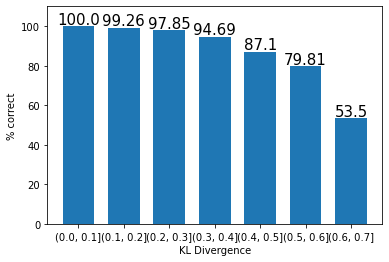

In [80]:
index = []
for i in (correctness1.index):
    index.append(str(i))
plt.bar(index,correctness1["percent"], width=0.7)
for index,data in enumerate(correctness1["percent"]):
    plt.text(x=index , y =data+1 , s=f"{round(data,2)}" , fontdict=dict(fontsize=15),ha='center')
plt.ylim(0,110)
plt.xlabel("KL Divergence")
plt.ylabel("% correct")

### Confidence

Text(0, 0.5, '% correct')

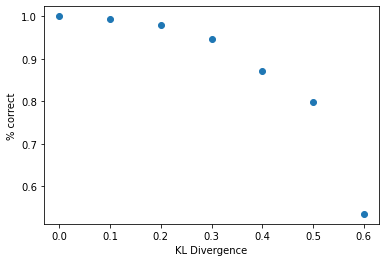

In [81]:
kl1 = table1[["correctness","count"]].groupby(pd.cut(table1["KL_div"], np.arange(0, 0.80, 0.1))).apply(sum)
kl1["percent"] = (kl1["correctness"]/kl1["count"])
kl1.dropna(inplace=True)
plt.scatter(np.arange(0, 0.70, 0.1), kl1["percent"])
plt.xlabel("KL Divergence")
plt.ylabel("% correct")

In [82]:
# Linear Regression
from sklearn.linear_model import LinearRegression

x_reg1 = np.arange(0, 0.70, 0.1).reshape((-1, 1))
y_reg1 = kl1["percent"]
reg_model1 = LinearRegression().fit(x_reg1,y_reg1)

In [83]:
print('intercept(alpha):', reg_model1.intercept_)
print('slope(theta):', reg_model1.coef_)

intercept(alpha): 1.0772552151012347
slope(theta): [-0.67558781]


# NN2 Odor - Almond (a)

#### Train Set and Test Set

In [31]:
from sklearn.model_selection import train_test_split
X_green = pd.DataFrame()
X_not_green = pd.DataFrame()
y_green = pd.Series(dtype='float64')
y_not_green = pd.Series(dtype='float64')
for i in range(0,len(X)):
    if X.loc[i,"odor"] == "a":
        X_green = X_green.append(X.iloc[i,:])
        y_green = y_green.append(pd.Series(y.iloc[i]))
    else:
        X_not_green = X_not_green.append(X.iloc[i,:])
        y_not_green = y_not_green.append(pd.Series(y.iloc[i]))

In [32]:
# X_test_green, X_train_green, y_test_green, y_train_green = train_test_split(X_green, y_green, test_size=1, random_state=721)
X_train_not_green, X_test_not_green, y_train_not_green, y_test_not_green = train_test_split(X_not_green, y_not_green, test_size=1-(6905/(8124-len(X_green))), random_state=721)

# print(X_test_green)
X_train_green = (X_train_not_green)
X_test_green = X_green.append(X_test_not_green)
y_train_green = (y_train_not_green)
y_test_green = y_green.append(y_test_not_green)

In [84]:
from sklearn.utils import shuffle
X_train_full2 = shuffle(X_train_green, random_state=721)
# X_test2 = shuffle(X_test_green, random_state=721)
y_train_full2 = shuffle(y_train_green, random_state=721)
# y_test2 = shuffle(y_test_green, random_state=721)

#### Validation Set

In [85]:
X_valid2, X_train2 = X_train_full2[:500], X_train_full2[500:]
y_valid2, y_train2 = y_train_full2[:500], y_train_full2[500:]

print("X_train:", X_train2.shape[0], "y_train", y_train2.shape[0])
print("X_valid: ", X_valid2.shape[0], "y_valid ", y_valid2.shape[0])
print("X_test: ", X_test.shape[0], "y_test ", X_test.shape[0])


X_train: 6404 y_train 6404
X_valid:  500 y_valid  500
X_test:  2000 y_test  2000


### Prepare the Data

#### Data Transformation

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

cat_attr_pipeline = Pipeline([
                        ('encoder', OrdinalEncoder())
                    ])

cols = list(X)
pipeline = ColumnTransformer([
                ('cat_attr_pipeline', cat_attr_pipeline, cols)
            ])


X_train2 = pipeline.fit_transform(X_train2)
X_valid2 = pipeline.fit_transform(X_valid2)
X_test2  = pipeline.fit_transform(X_test)
y_test2 = y_test

### Neural Network

#### Model

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense

In [88]:
# tf.random.set_random_seed(721)
tf.random.set_seed(721)

In [89]:
model2 = Sequential([
    InputLayer(input_shape=(22,)),    # input  layer
    Dense(45, activation='relu'),     # hidden layer
    Dense(1,   activation='sigmoid')  # output layer
])

In [90]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 45)                1035      
                                                                 
 dense_7 (Dense)             (None, 1)                 46        
                                                                 
Total params: 1,081
Trainable params: 1,081
Non-trainable params: 0
_________________________________________________________________


#### Compile the Model

In [91]:
model2.compile(loss='binary_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

#### Prepare Callbacks

In [92]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_cb = ModelCheckpoint('../SavedModels/best_model.h5',
                                save_best_only=True)

early_stopping_cb = EarlyStopping(patience=3,
                                  restore_best_weights=True)

### Training

In [93]:
train_model2 = model2.fit(X_train2, y_train2,
                        epochs=100,
                        validation_data=(X_valid2, y_valid2),
                        callbacks=[checkpoint_cb, early_stopping_cb])
                        


Epoch 1/100
201/201 [==============================] - 1s 3ms/step - loss: 0.4151 - accuracy: 0.8214 - val_loss: 0.3750 - val_accuracy: 0.8720
Epoch 2/100
201/201 [==============================] - 0s 1ms/step - loss: 0.3050 - accuracy: 0.8840 - val_loss: 0.2789 - val_accuracy: 0.9000
Epoch 3/100
201/201 [==============================] - 0s 2ms/step - loss: 0.2636 - accuracy: 0.9019 - val_loss: 0.3315 - val_accuracy: 0.8860
Epoch 4/100
201/201 [==============================] - 0s 2ms/step - loss: 0.2372 - accuracy: 0.9105 - val_loss: 0.2290 - val_accuracy: 0.9220
Epoch 5/100
201/201 [==============================] - 0s 2ms/step - loss: 0.2177 - accuracy: 0.9185 - val_loss: 0.2006 - val_accuracy: 0.9300
Epoch 6/100
201/201 [==============================] - 0s 1ms/step - loss: 0.2016 - accuracy: 0.9221 - val_loss: 0.2341 - val_accuracy: 0.9180
Epoch 7/100
201/201 [==============================] - 0s 2ms/step - loss: 0.1902 - accuracy: 0.9243 - val_loss: 0.1814 - val_accuracy: 0.9400

### Evaluate the Best Model on Test Set

In [94]:
results2 = model2.evaluate(X_test2, y_test2)
print("test loss, test acc:", results2)

63/63 [==============================] - 0s 998us/step - loss: 0.0706 - accuracy: 0.9795
test loss, test acc: [0.07055085152387619, 0.9794999957084656]


### Make Some Predictions

In [95]:
X_new2 = X_test2[1100:1110]
y_prob2 = model2.predict(X_new2)
# print(y_prob2.round(3))

In [96]:
y_pred2 = (model2.predict(X_new2) > 0.5).astype("int32")
# print(y_pred2)
y_test_pred2 = (model2.predict(X_test2) > 0.5).astype("int32")

## KL Divergence

In [97]:
# X_new = X_test[:5]
X_df2 = pd.DataFrame(model2.predict(X_test2))
y_test_pred2 = pd.DataFrame(y_test_pred2).reset_index(drop=True)
X_df2 = pd.concat([X_df2, y_test_pred2], axis=1)
y_test2 = y_test2.reset_index(drop=True)
X_df2 = pd.concat([X_df2, y_test2], axis=1)
X_df2.columns = ["X_pred","y_pred","y_actual"]
print(X_df2)

        X_pred  y_pred  y_actual
0     0.994067       1         1
1     0.988867       1         1
2     0.000596       0         0
3     0.001286       0         0
4     0.056038       0         0
...        ...     ...       ...
1995  0.004247       0         0
1996  0.991208       1         1
1997  0.163148       0         0
1998  0.985480       1         1
1999  0.051478       0         0

[2000 rows x 3 columns]


In [98]:
import math
table2 = pd.DataFrame(columns=["KL_div","abs_distance","y_pred","correctness"])
for i in range(0,len(X_df2)):
    # KL divergence
    p = X_df2.loc[i,"X_pred"]
    kl = -(p*math.log(p) + (1-p)*math.log(1-p))
    table2.loc[i,"KL_div"] = kl
    # absolute distance
    abs_dist = 2*abs(0.5-p)
    table2.loc[i,"abs_distance"] = abs_dist
    # correctness
    y_pred = X_df2.loc[i,"y_pred"]
    y_act = X_df2.loc[i,"y_actual"]
    if y_pred == y_act:
        table2.loc[i,"correctness"] = 1 # correct prediction
    else:
        table2.loc[i,"correctness"] = 0 # wrong prediction
    table2.loc[i,"y_pred"] = y_pred

print(table2)

        KL_div abs_distance y_pred correctness
0     0.036337     0.988133      1           1
1     0.061146     0.977733      1           1
2     0.005024     0.998807      0           1
3     0.009844     0.997428      0           1
4     0.215924     0.887924      0           1
...        ...          ...    ...         ...
1995  0.027436     0.991505      0           1
1996  0.050374     0.982416      1           1
1997  0.444854     0.673703      0           1
1998  0.075867      0.97096      1           1
1999  0.202845     0.897044      0           1

[2000 rows x 4 columns]


In [99]:
table2["count"] = 1
correctness2 = table2[["correctness","count"]].groupby(pd.cut(table2["KL_div"], np.arange(0, 0.8, 0.1))).apply(sum)
correctness2["percent"] = 100*(correctness2["correctness"]/correctness2["count"])
print(correctness2)

            correctness  count     percent
KL_div                                    
(0.0, 0.1]         1313   1313  100.000000
(0.1, 0.2]          214    214  100.000000
(0.2, 0.3]          151    151  100.000000
(0.3, 0.4]           79     82   96.341463
(0.4, 0.5]           77     80   96.250000
(0.5, 0.6]           61     67   91.044776
(0.6, 0.7]           64     93   68.817204


Text(0, 0.5, '% correct')

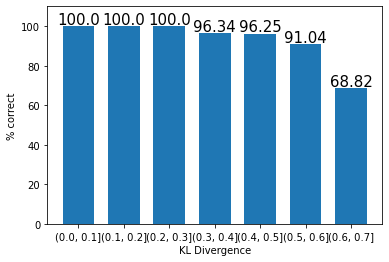

In [100]:
index = []
for i in (correctness2.index):
    index.append(str(i))
plt.bar(index,correctness2["percent"], width=0.7)
for index,data in enumerate(correctness2["percent"]):
    plt.text(x=index , y =data+1 , s=f"{round(data,2)}" , fontdict=dict(fontsize=15),ha='center')
plt.ylim(0,110)
plt.xlabel("KL Divergence")
plt.ylabel("% correct")

### Confidence

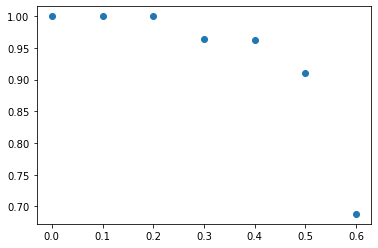

In [101]:
kl2 = table2[["correctness","count"]].groupby(pd.cut(table2["KL_div"], np.arange(0, 0.8, 0.1))).apply(sum)
kl2["percent"] = (kl2["correctness"]/kl2["count"])
kl2.dropna(inplace=True)
plt.scatter(np.arange(0, 0.70, 0.1), kl2["percent"])
# print(kl)
# print(np.arange(0, 0.7, 0.05))

In [102]:
# Linear Regression
from sklearn.linear_model import LinearRegression

x_reg2 = np.arange(0, 0.7, 0.1).reshape((-1, 1))
y_reg2 = kl2["percent"]
reg_model2 = LinearRegression().fit(x_reg2,y_reg2)

In [103]:
print('intercept(alpha):', reg_model2.intercept_)
print('slope(theta):', reg_model2.coef_)

intercept(alpha): 1.055514385683698
slope(theta): [-0.41146012]


## Algorithm C: It = argmax(Ct,i)

In [104]:
# Correct answer
ans = pd.DataFrame(X_df2["y_actual"])

# NN1
alpha1 = reg_model1.intercept_
theta1 = reg_model1.coef_

# NN2
alpha2 = reg_model2.intercept_
theta2 = reg_model2.coef_

In [105]:
kl_div_table1 = table1[["correctness","count"]].groupby(pd.cut(table1["KL_div"], np.arange(0, 0.8, 0.05))).apply(sum)
kl_div_table1["percent"] = (kl_div_table1["correctness"]/kl_div_table1["count"])

kl_div_table2 = table2[["correctness","count"]].groupby(pd.cut(table2["KL_div"], np.arange(0, 0.8, 0.05))).apply(sum)
kl_div_table2["percent"] = (kl_div_table2["correctness"]/kl_div_table2["count"])
print(kl_div_table2)

             correctness   count   percent
KL_div                                    
(0.0, 0.05]       1076.0  1076.0  1.000000
(0.05, 0.1]        237.0   237.0  1.000000
(0.1, 0.15]        129.0   129.0  1.000000
(0.15, 0.2]         85.0    85.0  1.000000
(0.2, 0.25]         96.0    96.0  1.000000
(0.25, 0.3]         55.0    55.0  1.000000
(0.3, 0.35]         35.0    36.0  0.972222
(0.35, 0.4]         44.0    46.0  0.956522
(0.4, 0.45]         40.0    41.0  0.975610
(0.45, 0.5]         37.0    39.0  0.948718
(0.5, 0.55]         30.0    33.0  0.909091
(0.55, 0.6]         31.0    34.0  0.911765
(0.6, 0.65]         27.0    33.0  0.818182
(0.65, 0.7]         37.0    60.0  0.616667
(0.7, 0.75]          0.0     0.0       NaN


In [126]:
# Creating NN tables
nn1 = table1.drop(["abs_distance","correctness"], axis=1)
nn1["conf"] = 0.8 + theta1 * nn1["KL_div"]

# for i in range(0,len(nn1)):
#     nn1.loc[i,"conf"] = kl_div_table1.loc[nn1.loc[i,"KL_div"],"percent"]

nn2 = table2.drop(["abs_distance","correctness"], axis=1)
nn2["conf"] = 1 + theta2 * nn2["KL_div"]

# for i in range(0,len(nn2)):
#     nn2.loc[i,"conf"] = kl_div_table2.loc[nn2.loc[i,"KL_div"],"percent"]
nn1

,KL_div,y_pred,count,conf
0,0.051795,1.0,1,0.765008
1,0.084785,1.0,1,0.74272
2,0.151691,0.0,1,0.697519
3,0.020196,0.0,1,0.786356
4,0.262003,0.0,1,0.622994
...,...,...,...,...
1995,0.41392,0.0,1,0.520361
1996,0.191014,1.0,1,0.670953
1997,0.690613,1.0,1,0.33343
1998,0.15459,1.0,1,0.695561


In [127]:
# Determing higher confidence NN and choosing that arm

for i in range(0,len(nn1)):
    if nn1.loc[i,"conf"] > nn2.loc[i,"conf"]:
        ans.loc[i,"y_pred"] = nn1.loc[i,"y_pred"]
        ans.loc[i,"chosen_NN"] = 1
        ans.loc[i,"chosen_conf"] = nn1.loc[i,"conf"]

        ans.loc[i,"not_NN"] = 2
        ans.loc[i,"not_conf"] = nn2.loc[i,"conf"]
    else:
        ans.loc[i,"y_pred"] = nn2.loc[i,"y_pred"]
        ans.loc[i,"chosen_NN"] = 2
        ans.loc[i,"chosen_conf"] = nn2.loc[i,"conf"]

        ans.loc[i,"not_NN"] = 1
        ans.loc[i,"not_conf"] = nn1.loc[i,"conf"]

ans

,y_actual,y_pred,chosen_NN,chosen_conf,not_NN,not_conf
0,1,1.0,2.0,0.985049,1.0,0.765008
1,1,1.0,2.0,0.974841,1.0,0.742720
2,0,0.0,2.0,0.997933,1.0,0.697519
3,0,0.0,2.0,0.995950,1.0,0.786356
4,0,0.0,2.0,0.911156,1.0,0.622994
...,...,...,...,...,...,...
1995,0,0.0,2.0,0.988711,1.0,0.520361
1996,1,1.0,2.0,0.979273,1.0,0.670953
1997,0,0.0,2.0,0.816960,1.0,0.333430
1998,1,1.0,2.0,0.968784,1.0,0.695561


#### Comparing performance

In [128]:
wrong_record = ""
# NN1 performance
cost1 = 0
for i in range(0,len(nn1)):
    if nn1.loc[i,"y_pred"] != ans.loc[i,"y_actual"]:
        # cost1 += 1 * nn1.loc[i,"conf"]
        cost1 += 1
    else:
        pass

# NN2 performance
cost2 = 0
for i in range(0,len(nn2)):
    if nn2.loc[i,"y_pred"] != ans.loc[i,"y_actual"]:
        # cost2 += 1 * nn2.loc[i,"conf"]
        cost2 += 1
    else:
        pass

# Combined performance
cost3 = 0
for i in range(0,len(nn1)):
    chosen_nn = int(ans.loc[i,"chosen_NN"])
    chosen_nn_conf = round(ans.loc[i,"chosen_conf"],3)
    not_nn = int(ans.loc[i,"not_NN"])
    not_nn_conf = round(ans.loc[i,"not_conf"],3)
    if ans.loc[i,"y_pred"] != ans.loc[i,"y_actual"]:
        cost3 += 1
        # cost3 += 1 * ans.loc[i,"chosen_conf"]
        wrong_record = wrong_record + (f"{i}: Wrong NN:{chosen_nn}, Conf:{chosen_nn_conf} - Other NN{not_nn}, Conf:{not_nn_conf} ") + "\n"
    else:
        pass

In [129]:
print(wrong_record)
print(f"Error count for NN1:{cost1}, NN2:{cost2}, Combined:{cost3}")


13: Wrong NN:2, Conf:0.715 - Other NN1, Conf:0.332 
166: Wrong NN:2, Conf:0.719 - Other NN1, Conf:0.406 
218: Wrong NN:2, Conf:0.728 - Other NN1, Conf:0.593 
284: Wrong NN:2, Conf:0.728 - Other NN1, Conf:0.52 
349: Wrong NN:2, Conf:0.733 - Other NN1, Conf:0.447 
455: Wrong NN:2, Conf:0.836 - Other NN1, Conf:0.43 
523: Wrong NN:2, Conf:0.718 - Other NN1, Conf:0.408 
537: Wrong NN:2, Conf:0.732 - Other NN1, Conf:0.407 
560: Wrong NN:2, Conf:0.791 - Other NN1, Conf:0.442 
583: Wrong NN:2, Conf:0.717 - Other NN1, Conf:0.333 
628: Wrong NN:2, Conf:0.851 - Other NN1, Conf:0.594 
644: Wrong NN:2, Conf:0.715 - Other NN1, Conf:0.426 
671: Wrong NN:2, Conf:0.725 - Other NN1, Conf:0.396 
691: Wrong NN:2, Conf:0.769 - Other NN1, Conf:0.337 
694: Wrong NN:2, Conf:0.72 - Other NN1, Conf:0.581 
730: Wrong NN:2, Conf:0.764 - Other NN1, Conf:0.334 
731: Wrong NN:2, Conf:0.722 - Other NN1, Conf:0.492 
769: Wrong NN:2, Conf:0.716 - Other NN1, Conf:0.41 
822: Wrong NN:2, Conf:0.715 - Other NN1, Conf:0.35 